In [1]:
import statsmodels.api as sm
import yfinance as yf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from src.config import load_config
import numpy as np

class Sim:
    def __init__(self,config,data=None):
        self.config = config
        self.data = data

    def fetch_data(self):
        """
        fetches data from yfinance consiting of only
        S&P500 and selected stock tickers from config
        """
        self.data = yf.download(tickers=self.config['sim_tickers'],start=self.config['start_date'],end=self.config['end_date'])['Close']
        self.data = self.data.dropna()
        return self.data
    
    def single_index_model(self,output_dir="images/sim"):
        if self.data is None:
            self.fetch_data()

        stock_tickers = self.config['stock_tickers']
        sp500_ticker = self.config['sp500_ticker']
        risk_free_rate = self.config['risk_free_rate']

        # to turn the data into seperate frame for market returns and stock returns
        stock_data = self.data[stock_tickers]
        sp500_data = self.data[sp500_ticker]



        Market_Excess_Returns = sp500_data - self.config['risk_free_rate']
        for stock_ticker in stock_tickers:
            stock_data = self.data[stock_ticker]
            Excess_Returns = stock_data - risk_free_rate
            std_of_excess_returns = np.std(Excess_Returns)
            model = sm.OLS(endog=stock_data,exog=sm.add_constant(Market_Excess_Returns)).fit()
            print(f'Single Index Model for: {stock_ticker}')
            print(f'Excess Returns for Historical Stock Data: {Excess_Returns}')
            print(f'Market Excess Return: {Market_Excess_Returns}')
            print(f'Standard Deviation of Excess Returns: {std_of_excess_returns}')
            print(model.summary())

            plt.figure(figsize=(12,6))
            sns.scatterplot(x=Market_Excess_Returns, y=Excess_Returns, label=stock_ticker)
            sns.lineplot(x=Market_Excess_Returns, y=model.fittedvalues, color='red', label='Security Market Line')
            plt.title(f'Single Index Model for {stock_ticker}')
            plt.xlabel('Market Excess Return')
            plt.ylabel(f'{stock_ticker} Excess Return')
            plt.legend()
            os.makedirs(output_dir, exist_ok=True)
            plt.savefig(os.path.join(output_dir, f"single_index_model_{stock_ticker}.png"))
            plt.show()
            plt.close()




/tmp/ipykernel_11602/912826276.py:20: FutureWarning: YF.download() has changed argument auto_adjust default to True
  self.data = yf.download(tickers=self.config['sim_tickers'],start=self.config['start_date'],end=self.config['end_date'])['Close']
[*********************100%***********************]  18 of 18 completed


Single Index Model for: AAPL
Excess Returns for Historical Stock Data: Date
2021-04-22    128.744691
2021-04-23    131.067247
2021-04-26    131.457597
2021-04-27    131.135560
2021-04-28    130.345109
                 ...    
2025-08-22    227.750795
2025-08-25    227.150804
2025-08-26    229.300798
2025-08-27    230.480805
2025-08-28    232.550798
Name: AAPL, Length: 1094, dtype: float64
Market Excess Return: Date
2021-04-22    4134.970780
2021-04-23    4180.160722
2021-04-26    4187.610917
2021-04-27    4186.711015
2021-04-28    4183.170976
                 ...     
2025-08-22    6466.900956
2025-08-25    6439.310624
2025-08-26    6465.930741
2025-08-27    6481.390702
2025-08-28    6501.850663
Name: ^GSPC, Length: 1094, dtype: float64
Standard Deviation of Excess Returns: 32.98598049264579
                            OLS Regression Results                            
Dep. Variable:                   AAPL   R-squared:                       0.775
Model:                            OLS  

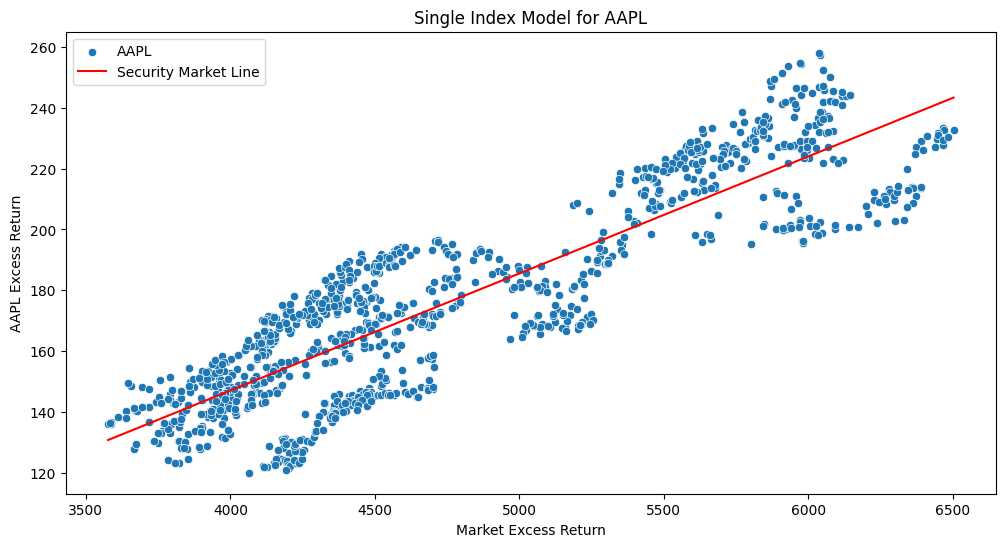

Single Index Model for: MSFT
Excess Returns for Historical Stock Data: Date
2021-04-22    247.786912
2021-04-23    251.621812
2021-04-26    252.007203
2021-04-27    252.411988
2021-04-28    245.272035
                 ...    
2025-08-22    507.220811
2025-08-25    504.250810
2025-08-26    502.030809
2025-08-27    506.730790
2025-08-28    509.630815
Name: MSFT, Length: 1094, dtype: float64
Market Excess Return: Date
2021-04-22    4134.970780
2021-04-23    4180.160722
2021-04-26    4187.610917
2021-04-27    4186.711015
2021-04-28    4183.170976
                 ...     
2025-08-22    6466.900956
2025-08-25    6439.310624
2025-08-26    6465.930741
2025-08-27    6481.390702
2025-08-28    6501.850663
Name: ^GSPC, Length: 1094, dtype: float64
Standard Deviation of Excess Returns: 78.81624256111104
                            OLS Regression Results                            
Dep. Variable:                   MSFT   R-squared:                       0.886
Model:                            OLS  

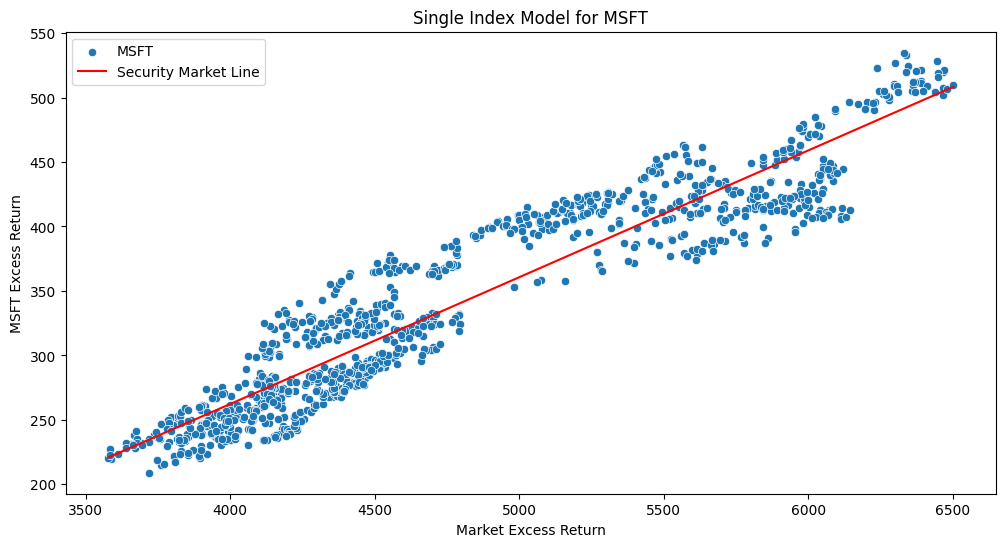

Single Index Model for: TGT
Excess Returns for Historical Stock Data: Date
2021-04-22    181.816285
2021-04-23    182.205445
2021-04-26    180.100389
2021-04-27    180.746064
2021-04-28    180.834519
                 ...    
2025-08-22     99.230798
2025-08-25     97.120797
2025-08-26     96.100801
2025-08-27     97.950799
2025-08-28     96.800798
Name: TGT, Length: 1094, dtype: float64
Market Excess Return: Date
2021-04-22    4134.970780
2021-04-23    4180.160722
2021-04-26    4187.610917
2021-04-27    4186.711015
2021-04-28    4183.170976
                 ...     
2025-08-22    6466.900956
2025-08-25    6439.310624
2025-08-26    6465.930741
2025-08-27    6481.390702
2025-08-28    6501.850663
Name: ^GSPC, Length: 1094, dtype: float64
Standard Deviation of Excess Returns: 37.770237353939635
                            OLS Regression Results                            
Dep. Variable:                    TGT   R-squared:                       0.142
Model:                            OLS   

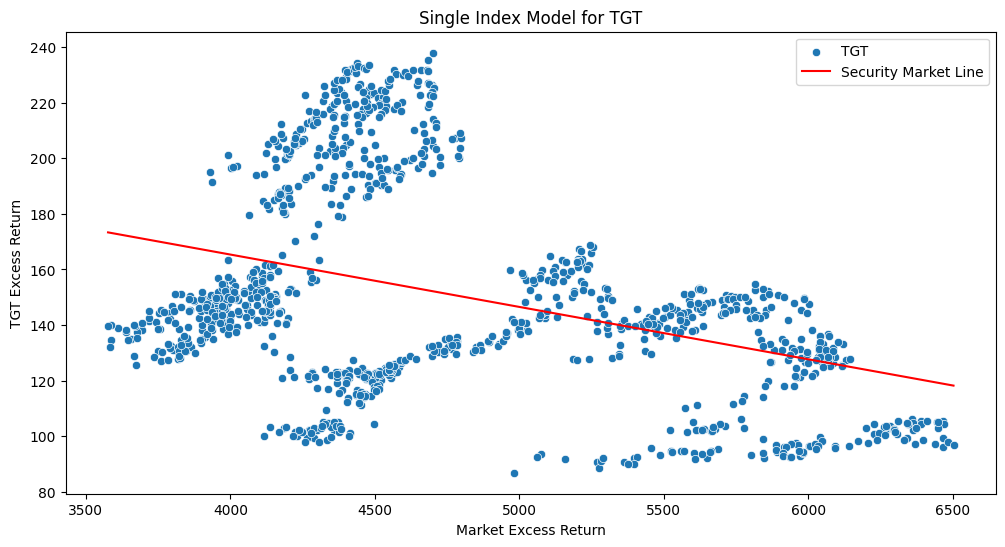

Single Index Model for: GM
Excess Returns for Historical Stock Data: Date
2021-04-22    54.908971
2021-04-23    55.752229
2021-04-26    56.411325
2021-04-27    57.147966
2021-04-28    56.740876
                ...    
2025-08-22    58.360799
2025-08-25    58.270799
2025-08-26    58.790799
2025-08-27    58.740800
2025-08-28    58.480802
Name: GM, Length: 1094, dtype: float64
Market Excess Return: Date
2021-04-22    4134.970780
2021-04-23    4180.160722
2021-04-26    4187.610917
2021-04-27    4186.711015
2021-04-28    4183.170976
                 ...     
2025-08-22    6466.900956
2025-08-25    6439.310624
2025-08-26    6465.930741
2025-08-27    6481.390702
2025-08-28    6501.850663
Name: ^GSPC, Length: 1094, dtype: float64
Standard Deviation of Excess Returns: 8.783593867627397
                            OLS Regression Results                            
Dep. Variable:                     GM   R-squared:                       0.263
Model:                            OLS   Adj. R-squared

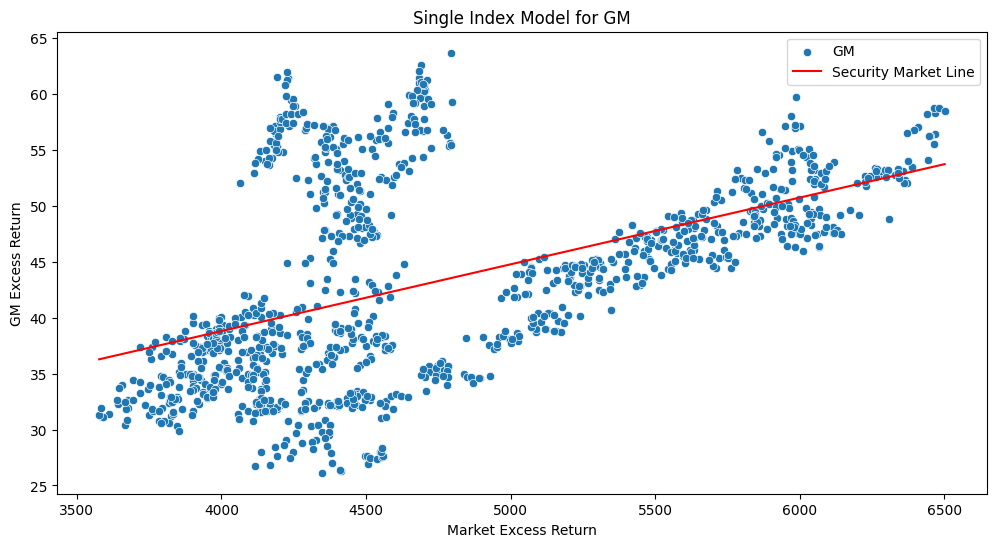

Single Index Model for: F
Excess Returns for Historical Stock Data: Date
2021-04-22     9.155064
2021-04-23     9.369972
2021-04-26     9.408350
2021-04-27     9.577206
2021-04-28     9.531155
                ...    
2025-08-22    11.730800
2025-08-25    11.810800
2025-08-26    11.830800
2025-08-27    11.900800
2025-08-28    11.700800
Name: F, Length: 1094, dtype: float64
Market Excess Return: Date
2021-04-22    4134.970780
2021-04-23    4180.160722
2021-04-26    4187.610917
2021-04-27    4186.711015
2021-04-28    4183.170976
                 ...     
2025-08-22    6466.900956
2025-08-25    6439.310624
2025-08-26    6465.930741
2025-08-27    6481.390702
2025-08-28    6501.850663
Name: ^GSPC, Length: 1094, dtype: float64
Standard Deviation of Excess Returns: 1.6949040281468424
                            OLS Regression Results                            
Dep. Variable:                      F   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:

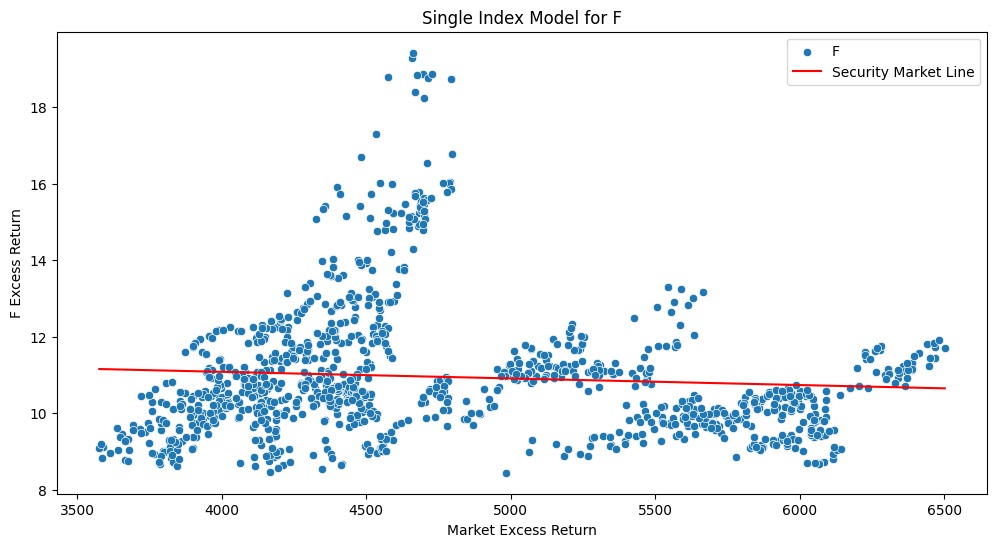

Single Index Model for: WMT
Excess Returns for Historical Stock Data: Date
2021-04-22    43.759534
2021-04-23    43.831597
2021-04-26    43.207997
2021-04-27    43.355279
2021-04-28    43.201718
                ...    
2025-08-22    96.820802
2025-08-25    96.060800
2025-08-26    96.040803
2025-08-27    96.070802
2025-08-28    96.100801
Name: WMT, Length: 1094, dtype: float64
Market Excess Return: Date
2021-04-22    4134.970780
2021-04-23    4180.160722
2021-04-26    4187.610917
2021-04-27    4186.711015
2021-04-28    4183.170976
                 ...     
2025-08-22    6466.900956
2025-08-25    6439.310624
2025-08-26    6465.930741
2025-08-27    6481.390702
2025-08-28    6501.850663
Name: ^GSPC, Length: 1094, dtype: float64
Standard Deviation of Excess Returns: 19.076674239657486
                            OLS Regression Results                            
Dep. Variable:                    WMT   R-squared:                       0.868
Model:                            OLS   Adj. R-squa

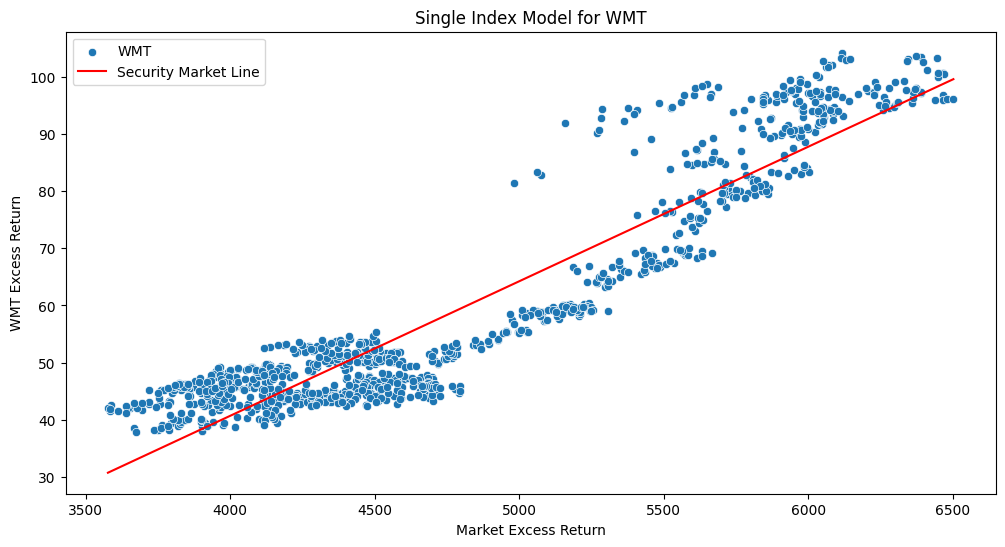

Single Index Model for: MCD
Excess Returns for Historical Stock Data: Date
2021-04-22    211.542436
2021-04-23    213.013581
2021-04-26    210.952195
2021-04-27    213.376817
2021-04-28    211.043000
                 ...    
2025-08-22    314.060807
2025-08-25    313.430802
2025-08-26    312.930802
2025-08-27    311.420793
2025-08-28    312.210801
Name: MCD, Length: 1094, dtype: float64
Market Excess Return: Date
2021-04-22    4134.970780
2021-04-23    4180.160722
2021-04-26    4187.610917
2021-04-27    4186.711015
2021-04-28    4183.170976
                 ...     
2025-08-22    6466.900956
2025-08-25    6439.310624
2025-08-26    6465.930741
2025-08-27    6481.390702
2025-08-28    6501.850663
Name: ^GSPC, Length: 1094, dtype: float64
Standard Deviation of Excess Returns: 29.375571199089116
                            OLS Regression Results                            
Dep. Variable:                    MCD   R-squared:                       0.509
Model:                            OLS   

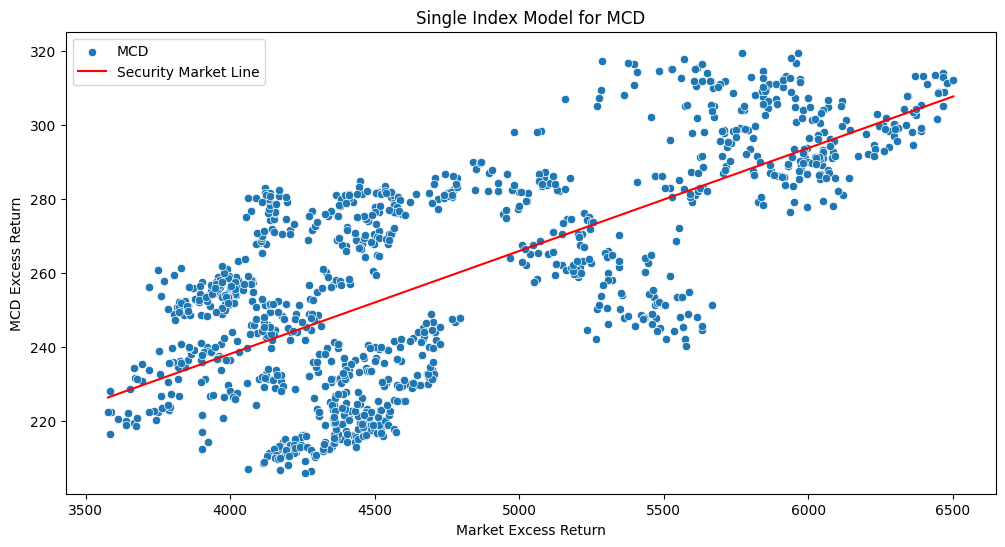

Single Index Model for: SBUX
Excess Returns for Historical Stock Data: Date
2021-04-22    104.758737
2021-04-23    106.240968
2021-04-26    104.758737
2021-04-27    104.966622
2021-04-28    101.577394
                 ...    
2025-08-22     88.370797
2025-08-25     85.800798
2025-08-26     86.620797
2025-08-27     87.650804
2025-08-28     88.010797
Name: SBUX, Length: 1094, dtype: float64
Market Excess Return: Date
2021-04-22    4134.970780
2021-04-23    4180.160722
2021-04-26    4187.610917
2021-04-27    4186.711015
2021-04-28    4183.170976
                 ...     
2025-08-22    6466.900956
2025-08-25    6439.310624
2025-08-26    6465.930741
2025-08-27    6481.390702
2025-08-28    6501.850663
Name: ^GSPC, Length: 1094, dtype: float64
Standard Deviation of Excess Returns: 10.532756571196268
                            OLS Regression Results                            
Dep. Variable:                   SBUX   R-squared:                       0.003
Model:                            OLS 

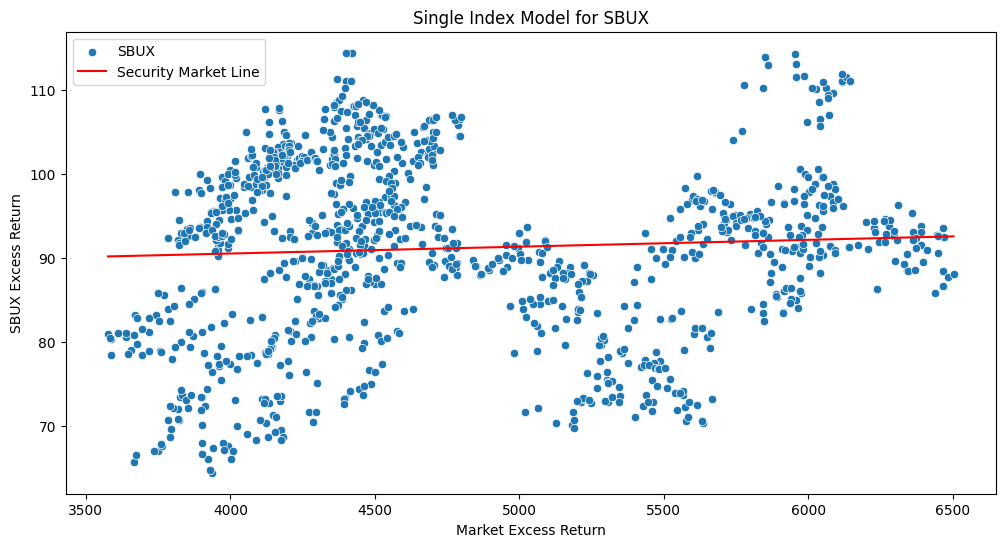

Single Index Model for: TSLA
Excess Returns for Historical Stock Data: Date
2021-04-22    239.887467
2021-04-23    243.124131
2021-04-26    246.057466
2021-04-27    234.904130
2021-04-28    231.457460
                 ...    
2025-08-22    340.000810
2025-08-25    346.590806
2025-08-26    351.660813
2025-08-27    349.590806
2025-08-28    345.970811
Name: TSLA, Length: 1094, dtype: float64
Market Excess Return: Date
2021-04-22    4134.970780
2021-04-23    4180.160722
2021-04-26    4187.610917
2021-04-27    4186.711015
2021-04-28    4183.170976
                 ...     
2025-08-22    6466.900956
2025-08-25    6439.310624
2025-08-26    6465.930741
2025-08-27    6481.390702
2025-08-28    6501.850663
Name: ^GSPC, Length: 1094, dtype: float64
Standard Deviation of Excess Returns: 66.10052545859145
                            OLS Regression Results                            
Dep. Variable:                   TSLA   R-squared:                       0.193
Model:                            OLS  

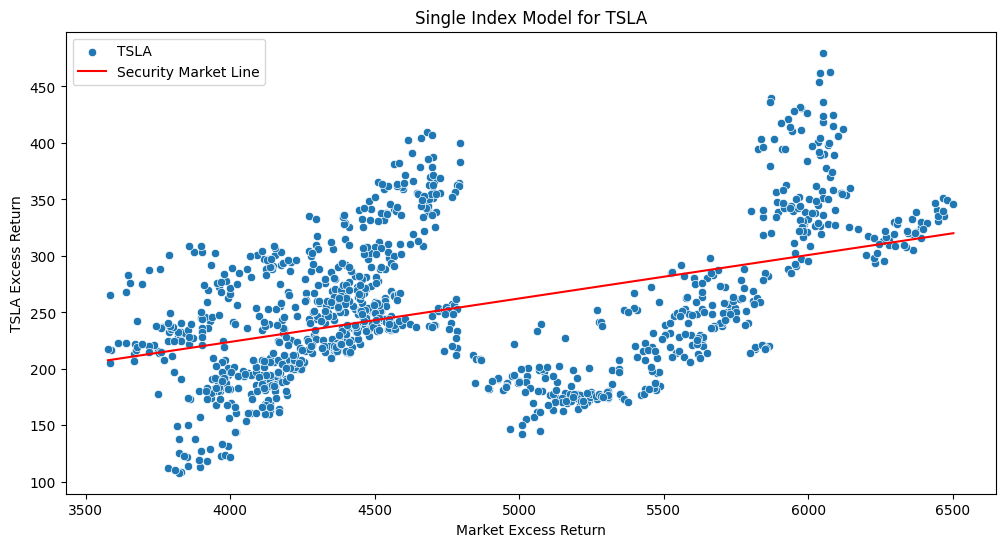

Single Index Model for: GOOGL
Excess Returns for Historical Stock Data: Date
2021-04-22    111.945375
2021-04-23    114.301744
2021-04-26    114.798761
2021-04-27    113.856912
2021-04-28    117.239617
                 ...    
2025-08-22    206.080796
2025-08-25    208.480805
2025-08-26    207.130799
2025-08-27    207.470796
2025-08-28    211.630799
Name: GOOGL, Length: 1094, dtype: float64
Market Excess Return: Date
2021-04-22    4134.970780
2021-04-23    4180.160722
2021-04-26    4187.610917
2021-04-27    4186.711015
2021-04-28    4183.170976
                 ...     
2025-08-22    6466.900956
2025-08-25    6439.310624
2025-08-26    6465.930741
2025-08-27    6481.390702
2025-08-28    6501.850663
Name: ^GSPC, Length: 1094, dtype: float64
Standard Deviation of Excess Returns: 28.907209981960214
                            OLS Regression Results                            
Dep. Variable:                  GOOGL   R-squared:                       0.885
Model:                            OL

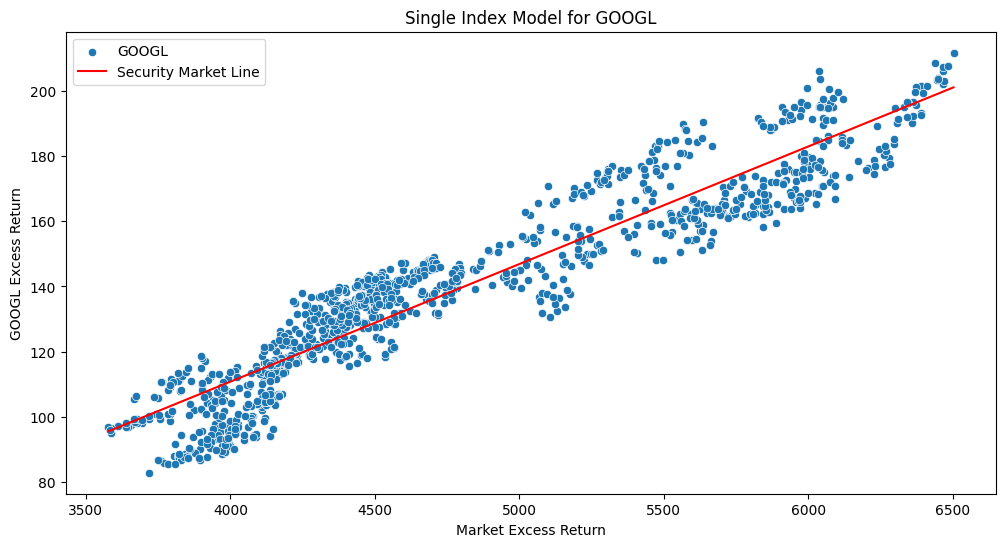

In [2]:
if __name__ == "__main__":
    config = load_config()
    sim_config = Sim(config)
    sim_config.single_index_model()